In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from simple_hierarchical_topic_model import SimpleHierarchicalTopicModel, load_vocab, loadmat

In [3]:
np.random.seed(1)

In [4]:
print("Loading data...")
data = loadmat("/Users/aleverentz/Code/anchor-word-recovery/M_nips.full_docs.mat.trunc.mat")["M"]
#data = loadmat("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts.mat")["M"]
print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
print("Nonzero entries: {}".format(data.nnz))
print("Loading vocab...")
vocab = load_vocab("/Users/aleverentz/Code/anchor-word-recovery/vocab.nips.txt.trunc")
#vocab = load_vocab("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts_vocab.txt")
print("Vocab size = {}".format(len(vocab)))
assert data.shape[0] == len(vocab)

Loading data...
Vocab size: 2940
Num documents: 1500
Nonzero entries: 585933
Loading vocab...
Vocab size = 2940


In [5]:
import os
import sys
sys.path.append(os.path.abspath(".."))
import text_utils

In [6]:
%%time

data, vocab = text_utils.xml_to_sparse_term_doc(
    filename = "/Users/aleverentz/Downloads/ap/ap_mod_xml.txt",
    within = ["toplevel"],
    eachdoc = ["DOC", "TEXT"],
    parser_type = "lxml-xml",
    tokenizer = text_utils.default_tokenizer)

print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
assert data.shape[0] == len(vocab)

Vocab size: 42756
Num documents: 2246
CPU times: user 28.5 s, sys: 157 ms, total: 28.6 s
Wall time: 28.7 s


In [7]:
model = SimpleHierarchicalTopicModel(
    branching_factors = [5, 5], num_epochs = 100,
    batch_size = 100, vocab = vocab)

In [8]:
model.fit(data)
top_words = model.get_top_words_by_node(num_words = 10)
model.print_top_words_by_node(num_words = 10);

100%|██████████| 224600/224600 [1:07:28<00:00, 55.48it/s, previousELBO=7.48e+08, Status=computing ELBO]


Top words by node:
()    : of, to, for, was, with, about, new, were, she, when
(0,)  : said, on, from, be, has, i, this, not, their, in
(1,)  : a, in, not, after, two, out, because, it, city, tuesday
(2,)  : said, that, would, we, been, from, more, it, than, up
(3,)  : and, at, a, has, that, his, as, said, their, party
(4,)  : it, as, president, million, which, its, n't, government, last, be
(0, 0): the, to, with, them, 1986, an, political, germany, on, down
(0, 1): he, 's, will, to, them, monday, services, who, on, part
(0, 2): the, he, with, will, they, them, monday, plan, down, on
(0, 3): the, he, 's, in, with, got, who, well, members, on
(0, 4): the, he, in, with, they, on, said, former, down, one
(1, 0): in, is, a, are, by, to, have, were, but, just
(1, 1): in, a, are, company, have, budget, but, were, nation, where
(1, 2): in, 's, a, are, to, monday, director, where, were, just
(1, 3): is, are, 's, a, or, by, were, just, year, should
(1, 4): in, is, 's, a, to, with, have, an, whe

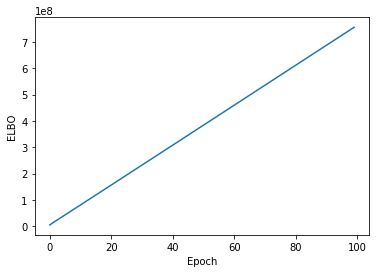

In [9]:
fig, ax = plt.subplots()
ax.plot(model.elbo_sequence)
ax.set_xlabel("Epoch")
ax.set_ylabel("ELBO")
None

In [10]:
topic_vectors = model.get_expected_topic_vectors()

In [11]:
topic_vectors.shape

(31, 42756)

In [12]:
variance = topic_vectors.var(axis=0)
print(variance.shape)
np.linalg.norm(variance)

(42756,)


0.017800479849025372

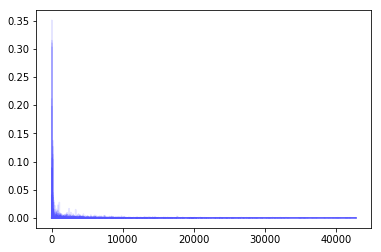

In [13]:
for i in range(10):
    plt.plot(topic_vectors[i,:], color='b', alpha=0.1);

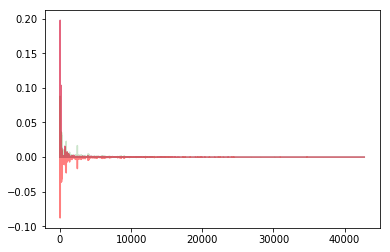

In [14]:
plt.plot(topic_vectors[0,:], color='b', alpha=0.2)
plt.plot(topic_vectors[1,:], color='g', alpha=0.2)
plt.plot(topic_vectors[0,:] - topic_vectors[1,:], color='r', alpha=0.5)
None